In [107]:
import pandas as pd
df_competition = pd.read_csv('competition_info.csv',encoding ='utf-8')
df_competition.head(4)

,ID,대회명,키워드,시작시간,종료시간,참여자 수,상금 정보,최대 팀원 수,수상자 수,일일 제출횟수,평가산식,참가조건 여부,연습가능 여부,아이디어 대회 여부,월간 데이콘 여부,대회 개요,데이터 설명,일정,상금 상세정보,규칙
0,ID_000,대출 상점 총 매출 예측 경진대회,알고리즘 | 정형 | 회귀 | 금융 | RMSE,2018-08-14,2018-09-13,577,"$8,500 + 100,000ZPR",5.0,3,5.0,RMSE,0,1,0,0,"<h2>1.배경</h2><p><span style=""background-color:...","<p>[기초 설명]</p><p><span style=""color: rgb(36, 4...",<p><strong>세부일정</strong></p><p><br></p><ul><li...,"<p><span style=""background-color: transparent;...","<p><br></p><p><span class=""ql-size-large"">A. 구..."
1,ID_001,아파트 경매가격 예측 경진대회,알고리즘 | 정형 | 회귀 | 아파트 | RMSE,2018-10-18,2018-12-31,612,"$10,000 + 120,000ZPR",10.0,3,3.0,RMSE,0,1,0,0,<h2>1.배경</h2><p>안녕하세요! <strong>아파트 경매 가격 예측 경진...,<p><br></p><p>[데이터 설명]</p><p><br></p><p>한국의 서울...,<h2>세부일정</h2><p><br></p><ul><li>제출 : 2018-10-1...,"<p><span style=""background-color: transparent;...","<p><br></p><p><span class=""ql-size-large"">제출한 ..."
2,ID_002,KBO 타자 OPS 예측 경진대회,알고리즘 | 정형 | 회귀 | 스포츠 | WRMSE,2019-02-08,2019-07-18,1103,800만원,5.0,3,3.0,WRMSE,0,1,0,0,<h2>1. 배경</h2><p>안녕하세요 여러분!? <strong>KBO 타자 OP...,"<p>약 350명의 타자들의 시즌별 성적, 생년월일, 몸무게, 키 등의 정보가 제공...",<h2>세부 일정</h2><p><br></p><ul><li>대회 공개 : 2019....,<p>? 총 상금 800만원</p><p><br></p><p>?1위 - 500만원</...,<h2>모델링 규칙</h2><p>\n각 참가자는 3월 31일까지 여러 submiss...
3,ID_003,상점 신용카드 매출 예측 경진대회,알고리즘 | 정형 | 회귀 | 매출 | 회귀 | MAE,2019-07-11,2019-10-21,1416,200만원,5.0,3,100.0,MAE,0,1,0,0,<h2>1. 배경</h2><p>안녕하세요 여러분!? <strong>상점 신용카드 매...,<p>1. funda_train.csv : 2019-02-28일까지의 상점별 카드 ...,<h2>세부 일정</h2><p>UTC+9 기준</p><p><br></p><ul><l...,<p>?7월 11일부터&nbsp;8월 30일까지 열렸던 대회에 대한 상금은 아래와 ...,<h2>단계별 방식 랭킹\n</h2><p><br></p><p> A. public...


# <span style="font-style:italic; font-weight:bold;font-family:serif; font-size:1.5em;line-height:1.5em;color:blue;">최대 팀원 수, 수상자 수, 일일 제출횟수를 조정하는 것은 참여자 수를 늘리는 데에 유효한가?</span>

최대 팀원 수


PearsonRResult(statistic=0.045080049972553785, pvalue=0.5851240251938453)

최대 팀원 수는 참여자 수에 영향을 주지 않는다.


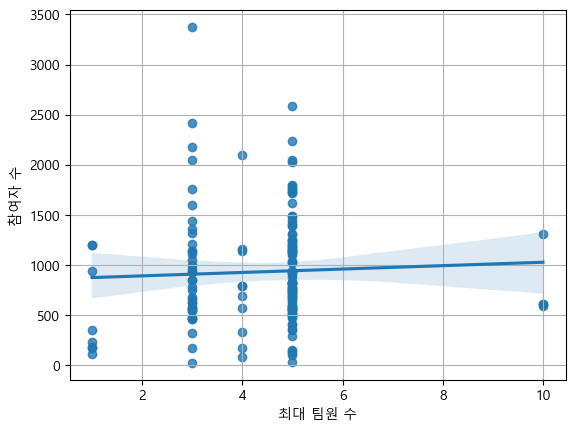

수상자 수


PearsonRResult(statistic=0.03426699351052273, pvalue=0.6782289088401827)

수상자 수는 참여자 수에 영향을 주지 않는다.


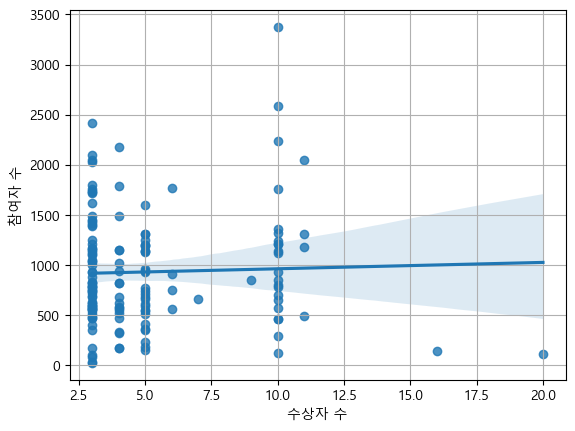

일일 제출횟수


PearsonRResult(statistic=-0.2356772414644827, pvalue=0.0038103281590203394)

일일 제출횟수는 참여자 수에 영향을 준다.


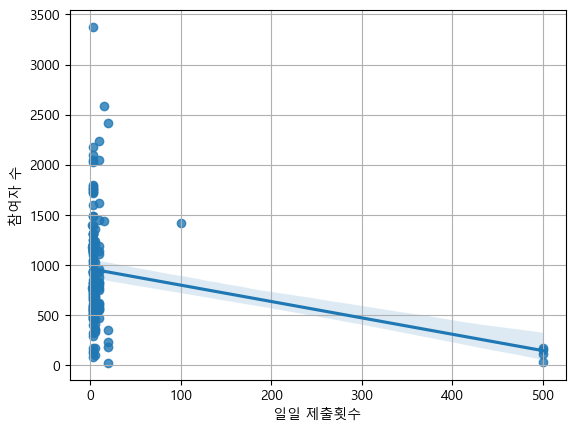

In [115]:
import seaborn as sns
import pandas as pd
import scipy.stats as spst
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['font.family']

target = '참여자 수'

analyze = ['최대 팀원 수', '수상자 수', '일일 제출횟수']

for feature in analyze:
    
    print(f"{feature}")
    result = spst.pearsonr(df_competition[feature], df_competition[target])
    display(result)

    if result[1] > 0.05:
        print(f"{feature}는 {target}에 영향을 주지 않는다.")
        
    else:
        print(f"{feature}는 {target}에 영향을 준다.")
        
    sns.regplot( x= feature, y = target, data = df_competition )
    plt.grid()
    plt.show()

In [116]:
display(df_competition['최대 팀원 수'].value_counts())
print('='*50)
display(df_competition['수상자 수'].value_counts())
print('='*50)
display(df_competition['일일 제출횟수'].value_counts())

최대 팀원 수
5.0     89
3.0     38
4.0     10
1.0      8
10.0     4
Name: count, dtype: int64

수상자 수
3     66
5     29
10    22
4     20
11     4
6      4
9      1
7      1
16     1
20     1
Name: count, dtype: int64

일일 제출횟수
3.0      91
10.0     22
5.0      21
20.0      5
500.0     4
2.0       3
15.0      2
100.0     1
Name: count, dtype: int64

# <span style="font-style:italic; font-weight:bold;font-family:serif; font-size:1.5em;line-height:1.5em;color:blue;">키워드 단어 구성</span>

In [60]:
word_list_1st = []
for i in range(len(df_competition['키워드'])):
    word_list_1st.append(df_competition['키워드'][i].split('|'))
print(word_list_1st)

[['알고리즘 ', ' 정형 ', ' 회귀 ', ' 금융 ', ' RMSE'], ['알고리즘 ', ' 정형 ', ' 회귀 ', ' 아파트 ', ' RMSE'], ['알고리즘 ', ' 정형 ', ' 회귀 ', ' 스포츠 ', ' WRMSE'], ['알고리즘 ', ' 정형 ', ' 회귀 ', ' 매출 ', ' 회귀 ', ' MAE'], ['알고리즘 ', ' 정형 ', ' 회귀 ', ' 공공 ', ' SMAPE'], ['알고리즘 ', ' 정형 ', ' 회귀 ', ' 공공 ', ' RMSE'], ['알고리즘 ', ' 정형 ', ' 회귀 ', ' 교통 ', ' RMSE'], ['알고리즘 ', ' 이미지 ', ' 객체 검출 ', ' 우주 ', ' mAP'], ['알고리즘 ', ' 텍스트 ', ' 분류 ', ' 금융 ', ' AUC'], ['알고리즘 ', ' 정형 ', ' 회귀 ', ' 산업 ', ' MAE'], ['알고리즘 ', ' 정형 ', ' 회귀 ', ' 산업   ', ' Log Loss '], ['알고리즘 ', ' 정형 ', ' 분류 ', ' 과학 ', '  LogLoss'], ['알고리즘 ', ' 정형 ', ' 분류 ', ' 게임 ', ' AUC'], [' 알고리즘 ', ' 정형 ', ' 회귀 ', ' 기상 ', ' MSE'], [' 분석시각화 ', ' 정형 ', ' 분석 ', ' 코로나 ', ' 정성평가 '], [' 알고리즘 ', ' 정형 ', ' 회귀 ', ' 기상 ', ' MAE,F1score'], ['알고리즘 ', ' 정형 ', ' 회귀 ', ' 에너지 ', ' WRMSSE'], ['알고리즘 ', ' 정형 ', ' 회귀 ', ' 바이오 ', ' MAE'], ['알고리즘 ', ' 정형 ', ' 강화 학습 ', ' 제조 '], ['알고리즘 ', ' 정형 ', ' 회귀 ', ' 산업 ', ' MSPE'], ['알고리즘 ', ' 정형 ', ' 회귀 ', ' 금융 ', ' RMSLE'], ['알고리즘 ', ' Audio ', ' 분류 ', ' 제어 ', '  KL

# <span style="font-style:italic; font-weight:bold;font-family:serif; font-size:1.5em;line-height:1.5em;color:blue;">전체 대회에 대해 키워드별 비중은 어떠한가</span>

In [103]:
keywords = df_competition['키워드'].str.split('|').explode()

print(len(keywords),'\n' )

print(round(keywords.value_counts().head(20) / len(keywords),5)*100)

736 

키워드
알고리즘               15.897
 정형                10.870
 회귀                 6.793
 분류                 6.658
 금융                 2.446
 정성평가               2.446
 RMSE               2.038
분석시각화               2.038
 CV                 1.902
 분석                 1.902
 비전                 1.902
 Macro f1 score     1.630
 언어                 1.630
 Accuracy           1.630
 NLP                1.359
 제어                 1.223
 MAE                1.223
 NMAE               0.951
 교통                 0.951
 LogLoss            0.815
Name: count, dtype: float64


# <span style="font-style:italic; font-weight:bold;font-family:serif; font-size:1.5em;line-height:1.5em;color:blue;">대회의 진행기간 정보를 추가하자</span>

In [114]:
df_competition['진행기간'] = pd.to_datetime(df_competition['종료시간']) - pd.to_datetime(df_competition['시작시간'])
df_competition.head(3)

,ID,대회명,키워드,시작시간,종료시간,참여자 수,상금 정보,최대 팀원 수,수상자 수,일일 제출횟수,...,참가조건 여부,연습가능 여부,아이디어 대회 여부,월간 데이콘 여부,대회 개요,데이터 설명,일정,상금 상세정보,규칙,진행기간
0,ID_000,대출 상점 총 매출 예측 경진대회,알고리즘 | 정형 | 회귀 | 금융 | RMSE,2018-08-14,2018-09-13,577,"$8,500 + 100,000ZPR",5.0,3,5.0,...,0,1,0,0,"<h2>1.배경</h2><p><span style=""background-color:...","<p>[기초 설명]</p><p><span style=""color: rgb(36, 4...",<p><strong>세부일정</strong></p><p><br></p><ul><li...,"<p><span style=""background-color: transparent;...","<p><br></p><p><span class=""ql-size-large"">A. 구...",30 days
1,ID_001,아파트 경매가격 예측 경진대회,알고리즘 | 정형 | 회귀 | 아파트 | RMSE,2018-10-18,2018-12-31,612,"$10,000 + 120,000ZPR",10.0,3,3.0,...,0,1,0,0,<h2>1.배경</h2><p>안녕하세요! <strong>아파트 경매 가격 예측 경진...,<p><br></p><p>[데이터 설명]</p><p><br></p><p>한국의 서울...,<h2>세부일정</h2><p><br></p><ul><li>제출 : 2018-10-1...,"<p><span style=""background-color: transparent;...","<p><br></p><p><span class=""ql-size-large"">제출한 ...",74 days
2,ID_002,KBO 타자 OPS 예측 경진대회,알고리즘 | 정형 | 회귀 | 스포츠 | WRMSE,2019-02-08,2019-07-18,1103,800만원,5.0,3,3.0,...,0,1,0,0,<h2>1. 배경</h2><p>안녕하세요 여러분!? <strong>KBO 타자 OP...,"<p>약 350명의 타자들의 시즌별 성적, 생년월일, 몸무게, 키 등의 정보가 제공...",<h2>세부 일정</h2><p><br></p><ul><li>대회 공개 : 2019....,<p>? 총 상금 800만원</p><p><br></p><p>?1위 - 500만원</...,<h2>모델링 규칙</h2><p>\n각 참가자는 3월 31일까지 여러 submiss...,160 days


# <span style="font-style:italic; font-weight:bold;font-family:serif; font-size:1.5em;line-height:1.5em;color:blue;">대회의 진행 기간과 참여자수는 상관관계가 있는가? </span>

In [158]:
display(df_competition['진행기간'][0])
display(df_competition['진행기간'][0].days)

df_competition['진행기간'] = df_competition['진행기간'].apply(lambda x: x.days)
df_competition['진행기간']

Timedelta('30 days 00:00:00')

30

0       30
1       74
2      160
3      102
4       26
      ... 
144     42
145      3
146     35
147     28
148      3
Name: 진행기간, Length: 149, dtype: int64

진행기간


PearsonRResult(statistic=0.09886800193529112, pvalue=0.23028868803509195)

진행기간는 참여자 수에 영향을 주지 않는다.


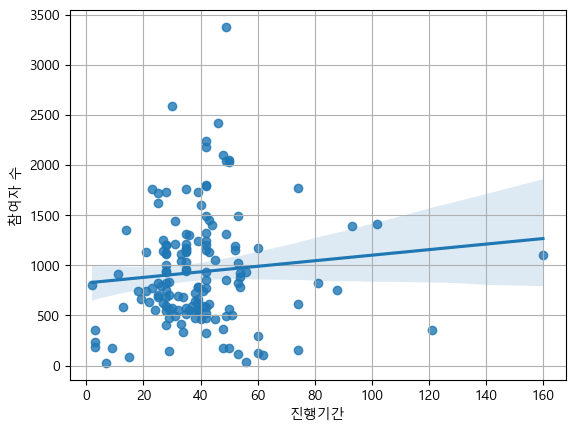

In [160]:
import seaborn as sns
import pandas as pd
import scipy.stats as spst
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['font.family']

target = '참여자 수'

analyze = ['진행기간']

for feature in analyze:
    
    print(f"{feature}")
    result = spst.pearsonr(df_competition[feature], df_competition[target])
    display(result)

    if result[1] > 0.05:
        print(f"{feature}는 {target}에 영향을 주지 않는다.")
        
    else:
        print(f"{feature}는 {target}에 영향을 준다.")
        
    sns.regplot( x= feature, y = target, data = df_competition )
    plt.grid()
    plt.show()

# <span style="font-style:italic; font-weight:bold;font-family:serif; font-size:1.5em;line-height:1.5em;color:blue;">데이터 설명과 상금 상세정보의 단어별 언급 횟수</span>

In [161]:
df_competition.loc[:,['데이터 설명','상금 상세정보']]

,데이터 설명,상금 상세정보
0,"<p>[기초 설명]</p><p><span style=""color: rgb(36, 4...","<p><span style=""background-color: transparent;..."
1,<p><br></p><p>[데이터 설명]</p><p><br></p><p>한국의 서울...,"<p><span style=""background-color: transparent;..."
2,"<p>약 350명의 타자들의 시즌별 성적, 생년월일, 몸무게, 키 등의 정보가 제공...",<p>? 총 상금 800만원</p><p><br></p><p>?1위 - 500만원</...
3,<p>1. funda_train.csv : 2019-02-28일까지의 상점별 카드 ...,<p>?7월 11일부터&nbsp;8월 30일까지 열렸던 대회에 대한 상금은 아래와 ...
4,<p>본 대회에서는 2016년 7월 20일부터 2018년 6월 30일까지의 국내 특...,<p><strong>데이터 사이언스 콘테스트 부문</strong></p><p>?1등...
...,...,...
144,"<h4>대회에 참가하여 데이터를 다운받고자 할 경우 <span style=""colo...","<h3><span style=""background-color: transparent..."
145,"<p><strong style=""color: rgb(0, 102, 204);"">Da...",<h3>? 수상 인증서 ?</h3><p>대회 1등부터 5등까지는 <strong>수상...
146,"<p><strong style=""color: rgb(230, 0, 0);"">※ 기존...","<h3><strong style=""background-color: transpare..."
147,"<p><strong style=""color: rgb(0, 102, 204);"">Da...","<h3><strong style=""background-color: transpare..."


In [321]:
wordList = df_competition['데이터 설명'].str.split(' ')
print(wordList)
print(type(wordList))
wordCount = {}

for i in range(len(wordList)):
    print(wordList[i])
    
    for j in wordList[i]:
        wordCount[j] = wordList[i].count(j)


0      [<p>[기초, 설명]</p><p><span, style="color:, rgb(3...
1      [<p><br></p><p>[데이터, 설명]</p><p><br></p><p>한국의,...
2      [<p>약, 350명의, 타자들의, 시즌별, 성적,, 생년월일,, 몸무게,, 키, ...
3      [<p>1., funda_train.csv, :, 2019-02-28일까지의, 상점...
4      [<p>본, 대회에서는, 2016년, 7월, 20일부터, 2018년, 6월, 30일...
                             ...                        
144    [<h4>대회에, 참가하여, 데이터를, 다운받고자, 할, 경우, <span, sty...
145    [<p><strong, style="color:, rgb(0,, 102,, 204)...
146    [<p><strong, style="color:, rgb(230,, 0,, 0);"...
147    [<p><strong, style="color:, rgb(0,, 102,, 204)...
148    [<p><strong, style="color:, rgb(0,, 102,, 204)...
Name: 데이터 설명, Length: 149, dtype: object
<class 'pandas.core.series.Series'>
['<p>[기초', '설명]</p><p><span', 'style="color:', 'rgb(36,', '41,', '46);">한국의', '약', '2,000개', '상점의', '신용카드', '거래', '내역이', '제공됩니다.', 'card_id를', '기준으로', '샘플링되었으며,', 'amount의', '단위는', 'KRW가', '아닙니다.', '테스트', '파일에서', '각', '상점의', '마지막', '매출', '발생일', '다음', '날부터', '100일', '후까지', '매출의', '총합을', '예측해야', '

TypeError: 'float' object is not iterable

In [322]:
# 딕셔너리를 값에 따라 내림차순으로 정렬
sorted_wordCount = dict(sorted(wordCount.items(), key=lambda item: item[1], reverse=True))

# 결과 출력
print(sorted_wordCount)

{'│': 39, '├': 24, '해빙': 16, '객체': 14, 'rgb(68,': 13, '68,': 13, 'class="ql-align-justify"><span': 11, 'rgb(136,': 11, '136,': 11, '농도': 10, '주별': 10, '검출한': 10, 'style="background-color:': 9, '': 8, '일별': 8, '68);">': 8, 'OR': 8, 'wav': 8, '분자의': 8, '└': 8, '[Folder]</p><p>': 8, '아이템': 7, 'rgb(0,': 7, '관측': 7, 'ANY': 7, 'folder': 7, '0,': 7, '...</p><p>': 7, '경매': 6, 'color:': 6, '파일': 6, '성형': 6, '공정': 6, '(type:': 6, '…,': 6, '수,': 6, 'OF': 6, '뉴스': 6, '데이터(<a': 6, 'href="https://www.data.go.kr/"': 6, 'transparent;': 6, '연속된': 6, 'player': 5, '경기': 5, 'SMP': 5, '라인': 5, '68);">\t</span>\t\t<span': 5, '오일': 5, 'class="ql-indent-1">id': 5, '255);">https://www.data.go.kr/</a>)</li><li': 5, 'KT': 5, '종목': 5, '-': 4, '낙찰가를': 4, '타자들의': 4, ':': 4, '2018년': 4, '모': 4, '박막의': 4, '반사율': 4, '파장에': 4, '발전소': 4, '</span></p><p><span': 4, '내': 4, '승리': 4, '기상청': 4, '기간': 4, '①': 4, '<strong>②': 4, '자료': 4, '측정': 4, '스펙트럼': 4, '(650': 4, 'nm': 4, '990': 4, '투입': 4, '개수': 4, '내역': 4, '코로나': 4, 'cl

In [323]:
wordList = df_competition['상금 상세정보'].str.split(' ')
print(wordList)
wordCount = {}

for i in range(len(wordList)):
    # print(wordList[i])
    
    for j in wordList[i]:
        wordCount[j] = wordList[i].count(j)

print(type(wordCount),'\n' ) 
print(len(wordCount) )  
print()

0      [<p><span, style="background-color:, transpare...
1      [<p><span, style="background-color:, transpare...
2      [<p>?, 총, 상금, 800만원</p><p><br></p><p>?1위, -, 5...
3      [<p>?7월, 11일부터&nbsp;8월, 30일까지, 열렸던, 대회에, 대한, 상...
4      [<p><strong>데이터, 사이언스, 콘테스트, 부문</strong></p><p...
                             ...                        
144    [<h3><span, style="background-color:, transpar...
145    [<h3>?, 수상, 인증서, ?</h3><p>대회, 1등부터, 5등까지는, <st...
146    [<h3><strong, style="background-color:, transp...
147    [<h3><strong, style="background-color:, transp...
148    [<h3>?, 수상, 인증서, ?</h3><p>대회, 1등부터, 5등까지는, <st...
Name: 상금 상세정보, Length: 149, dtype: object
<class 'dict'> 

1986



In [324]:
# 딕셔너리를 값에 따라 내림차순으로 정렬
sorted_wordCount = dict(sorted(wordCount.items(), key=lambda item: item[1], reverse=True))

# 결과 출력
print(sorted_wordCount)

{'': 41, '위:': 16, '₩': 16, '&nbsp;': 14, 'class="ql-align-justify">': 12, '#': 9, 'class="ql-indent-1"><strong>': 9, '100,000</strong></p><p': 9, '&nbsp;&nbsp;\n&nbsp;': 6, '&amp;': 6, 'href="https://dacon.io/more/notice/77"': 5, '</em></a><a': 5, '※': 5, '일자별': 4, "'''\n&nbsp;": 4, 'dataframe': 4, 'with': 4, 'values': 4, 'of': 4, 'X,Y,M,V\n&nbsp;': 4, '68);': 4, 'rgb(35,': 4, '82,': 4, '124);': 4, '0);">•?</span>부경대학교총장상(1팀)<span': 4, '사장상': 4, '본선': 4, 'rgb(230,': 4, '블룸버그': 4, '</strong><span': 4, '0,': 3, '-': 3, '및': 3, '만원': 3, '</span>총': 3, '상금의': 3, '데이콘': 3, '원</span></p><p><span': 3, '셀렉트스타': 3, '특별': 3, '값을': 3, 'min': 3, 'max': 3, '1팀': 3, '300만원</p><p><span': 3, '</span></p><p><span': 3, '0);">•?</span>한수원상': 3, 'rgb(68,': 3, '68,': 3, '0);">•</span>?<span': 3, '0);">?</span><span': 3, '0);">•</span>?최우수상': 3, '0);">•</span>?우수상': 3, 'transparent;">•</span><span': 3, '0);">•</span>?<strong': 3, '?': 3, 'transparent;">•?</span>한수원상': 3, '특전</h4><p': 3, '204);">본선': 3, 'rg

In [ ]:
df_competition.loc['상금 상세정보']

In [2]:
df_competition.sort_values(by = '참여자 수', ascending = False)

,ID,대회명,키워드,시작시간,종료시간,참여자 수,상금 정보,최대 팀원 수,수상자 수,일일 제출횟수,평가산식,참가조건 여부,연습가능 여부,아이디어 대회 여부,월간 데이콘 여부,대회 개요,데이터 설명,일정,상금 상세정보,규칙
51,ID_051,월간 데이콘 신용카드 사용자 연체 예측 AI 경진대회,알고리즘 | 정형 | 분류 | 금융 | LogLoss,2021-04-05,2021-05-24,3377,100만원,3.0,10,3.0,LogLoss,0,1,0,1,"<h2><strong style=""color: black;"">1. 배경</stron...","<p><a href=""https://www.dacon.io/competitions/...",<h2><strong>세부 일정</strong></h2><p><br></p><ul>...,<h2><strong>DACON Scholarship</strong></h2><p>...,<h2><strong>1. 평가</strong></h2><ul><li>심사 기준: ...
22,ID_022,포스트 코로나 데이터 시각화 경진대회,분석시각화 | 정형 | 분석 | 유동인구 | 정성평가,2020-07-01,2020-07-31,2583,NaN,5.0,10,15.0,정성평가,0,1,1,0,"<h2><span style=""background-color: transparent...",<p>※ 20200703 21:13: index.csv 데이터 업데이트</p><p>...,<h2><strong>세부일정&nbsp;(UTC+ 9&nbsp;기준)</strong...,"<p><span style=""color: rgb(0, 0, 0); backgroun...",<h2>1. 평가</h2><p>- 평가 지표: 가중치 투표</p><p>&nbsp;-...
55,ID_055,전력사용량 예측 AI 경진대회,시계열 | SMAPE | 한국에너지공단 | 전력,2021-05-10,2021-06-25,2415,"1,800만원",3.0,3,20.0,SMAPE,0,1,0,0,"<h2><strong style=""color: black;"">1. 배경</stron...",<p><strong>[데이터]</strong></p><p><strong>1. tra...,<h2><strong>세부 일정</strong></h2><p><br></p><ul>...,<h2><strong>? 총상금 1800만원</strong></h2><p><br><...,<h1><strong>규칙</strong></h1><p><br></p><h2><st...
14,ID_014,월간 데이콘 코로나 데이터 시각화 AI 경진대회,분석시각화 | 정형 | 분석 | 코로나 | 정성평가,2020-03-29,2020-05-10,2242,250만원,5.0,10,10.0,정성평가,0,1,1,1,"<h2><strong>1.배경</strong></h2><p><span style=""...",<p>▶<strong> 대회 진행 기간 내 데이터 구성 변경 가능</strong><...,<p><strong>세부일정</strong></p><p><br></p><ul><li...,"<p><span style=""background-color: transparent;...",<p>A. 평가 및 순위 결정</p><p>&nbsp;&nbsp;&nbsp;&nbsp...
138,ID_138,2023 전력사용량 예측 AI 경진대회,알고리즘 | 정형 | 시계열 | 에너지 | SMAPE,2023-07-17,2023-08-28,2180,"2,000만원",3.0,4,3.0,SMAPE,0,1,0,0,<h3>[배경]</h3><p>안정적이고 효율적인 에너지 공급을 위해서는 전력 사용량...,"<p><strong style=""color: rgb(0, 102, 204);"">Da...","<h3><strong style=""color: rgb(230, 0, 0);"">대회 ...","<h3><strong style=""background-color: transpare...","<h3>1. 리더보드</h3><ul><li>심사 기준: <span style=""co..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,ID_127,데이크루 5기,데이크루 | 서포터즈 | 5기,2023-04-03,2023-05-26,115,"기프티콘, 인증서",1.0,20,500.0,정성평가,0,1,1,0,<h3><strong>[소개]</strong></h3><p>데이크루(DACrew)는...,NaN,<h3>데이크루 페이지 오픈</h3><ul><li>2023년 3월 29일 </li>...,<h3><strong>[우수 활동 시상]</strong></h3><p>? 1~20등...,<h3>[유의 사항]</h3><ol><li>이번 데이크루 5기는 <strong>개인...
72,ID_072,2021 JOISS 해양과학 빅데이터 활용 경진대회,분석시각화 | 정형 | 시각화 | 환경 | 정성평가,2021-09-01,2021-11-02,104,"총 2,000만원",5.0,3,5.0,정성평가,0,0,1,0,"<h2>1.배경</h2><p><span style=""background-color:...","<p>‘해양과학데이터 저장소(JOISS, <a href=""https://joiss....",<p><br></p><ul><li>대회 기간 : 2021년 9월 1일 10:00 ~...,"<p><span style=""background-color: transparent;...",<h1><strong>규칙</strong></h1><p><br></p><p><str...
32,ID_032,꿈꾸는아이(AI) 전력 수요량 예측 경진대회,알고리즘 | 정형 | 회귀 | 전력 수요량 | power demand | SMAPE,2020-10-29,2020-11-13,87,NaN,4.0,3,3.0,SMAPE,0,0,0,0,"<p><strong class=""ql-size-large"">\t\t*꿈꾸는아이(AI...","<p><span style=""color: rgb(136, 136, 136);"">1)...","<p><br></p><ul><li><span style=""color: rgb(136...",<p>본 대회는 2020 DREAM_AI Open Challenge 문제의 일부입니...,"<p><strong style=""color: rgb(136, 136, 136);"" ..."
97,ID_097,데이크루 3기 ?,데이크루 | 서포터즈 | 3기,2022-07-06,2022-08-31,37,NaN,5.0,3,500.0,정성평가,0,1,1,0,<p><strong>데이크루(DACrew)</strong>는 데이콘 플랫폼의 커뮤니...,<p><strong>Sample submission data</strong></p>...,<ul><li><strong>모집</strong> ? : 6월 20일(월) ~ 7월...,<p><strong>? 우수 활동 4팀 시상 </strong>?</p><ul><li...,<p>? 주 1회 이상 필수 업로드 </p>


In [3]:
df_competition.loc[df_competition['키워드'].str.contains("금융"),:].head()

,ID,대회명,키워드,시작시간,종료시간,참여자 수,상금 정보,최대 팀원 수,수상자 수,일일 제출횟수,평가산식,참가조건 여부,연습가능 여부,아이디어 대회 여부,월간 데이콘 여부,대회 개요,데이터 설명,일정,상금 상세정보,규칙
0,ID_000,대출 상점 총 매출 예측 경진대회,알고리즘 | 정형 | 회귀 | 금융 | RMSE,2018-08-14,2018-09-13,577,"$8,500 + 100,000ZPR",5.0,3,5.0,RMSE,0,1,0,0,"<h2>1.배경</h2><p><span style=""background-color:...","<p>[기초 설명]</p><p><span style=""color: rgb(36, 4...",<p><strong>세부일정</strong></p><p><br></p><ul><li...,"<p><span style=""background-color: transparent;...","<p><br></p><p><span class=""ql-size-large"">A. 구..."
8,ID_008,금융 문자 분석 경진대회,알고리즘 | 텍스트 | 분류 | 금융 | AUC,2019-11-21,2020-01-12,1152,"2,000만원",5.0,3,3.0,AUC,0,1,0,0,<h2>1. 배경</h2><p>안녕하세요 여러분!? 금융 문자 분석 경진대회에 오신...,<p>-&nbsp;KB금융그룹 및&nbsp;KISA(한국인터넷진흥원)에서 제공받은 ...,<h2>세부 일정</h2><p>UTC+ 9 (한국)&nbsp;기준<span clas...,"<p>?총 상금&nbsp;2,000만원, 총 수여 팀 수&nbsp;7팀</p><p>...",<h2>1. 평가</h2><p><strong>A.&nbsp;공개&nbsp;랭킹&nb...
20,ID_020,제주 신용카드 빅데이터 경진대회,알고리즘 | 정형 | 회귀 | 금융 | RMSLE,2020-06-22,2020-07-31,1727,600만원,5.0,3,3.0,RMSLE,0,1,0,0,<h2>1. 배경</h2><p>안녕하세요 여러분!? <strong>제주 신용카드 빅...,<h2>※ 본 데이터는 더이상 다운로드 받으실 수 없습니다.</h2><h2><br>...,<h2>세부 일정</h2><p><br></p><ul><li>대회 기간 : 2020년...,<p>? 총 상금 600만원</p><p><br></p><p>- ?1위 (대상) : ...,<h2>1. 평가식</h2><p>- RMSLE (Root Mean Square Lo...
37,ID_037,Y&Z세대 투자자 프로파일링 시각화 경진대회,"분석시각화 | 정형 | 분류 | 금융 | 정성평가| 중복참가 불가, 대학 재학생만 ...",2020-11-23,2020-12-31,473,"총 5,000만원(League1,2 통합)",3.0,3,10.0,정성평가,0,0,1,0,"<h2>1.배경</h2><p><span style=""background-color:...","<h2 class=""ql-align-center""><strong class=""ql-...",<p><strong>UTC+ 9 (한국) 기준</strong></p><p>&nbsp...,"<p><span style=""background-color: transparent;...","<h2><strong>평가</strong></h2><p><img width=""70%..."
38,ID_038,"AI야 , 진짜 뉴스를 찾아줘! AI 경진대회",알고리즘 | 텍스트 | 분류 | 금융 | Accuracy + Time,2020-11-23,2020-12-31,544,"총 5,000만원(League1,2 통합)",3.0,3,3.0,Time,0,0,0,0,"<h2>1.배경</h2><p><span style=""background-color:...","<h2 class=""ql-align-center""><strong class=""ql-...",<p><strong>UTC+ 9 (한국) 기준</strong></p><p><stro...,"<p><br></p><p><span style=""background-color: t...","<p><strong>평가</strong></p><p><img width=""70%"" ..."


In [4]:
df_competition['아이디어 대회 여부'].value_counts()

아이디어 대회 여부
0    124
1     25
Name: count, dtype: int64

In [5]:
df_competition.groupby(by = '일일 제출횟수', as_index= False)['참여자 수'].mean()

,일일 제출횟수,참여자 수
0,2.0,1116.333333
1,3.0,1003.098901
2,5.0,650.809524
3,10.0,979.227273
4,15.0,2011.000000
5,20.0,642.000000
6,100.0,1416.000000
7,500.0,121.000000


In [6]:
df_competition['상금 정보'] = df_competition['상금 정보'].replace( {  '000만원':0})

df_competition['상금 정보'] = df_competition['상금 정보'].replace( {  '83만원':83})

df_competition['상금 정보'] = df_competition['상금 정보'].replace( {  '100만원':100, '총 100만원' :100})
df_competition['상금 정보'] = df_competition['상금 정보'].replace( {  '154만원':154}) 

df_competition['상금 정보'] = df_competition['상금 정보'].replace( {  ' 200만원':200, '200':200})
df_competition['상금 정보'] = df_competition['상금 정보'].replace( {  ' 250만원':250, '250만원':250})



df_competition['상금 정보'] = df_competition['상금 정보'].replace( {  '300만 원':300, ' 300만원' :300, '총 300만원':300, '300 만원':300, '총 300만 원':300}) 
df_competition['상금 정보'] = df_competition['상금 정보'].replace( {  '400만원':400, '400 만원':400 }) 
df_competition['상금 정보'] = df_competition['상금 정보'].replace( {  '500만원':500 , '500 만원':500, '총 500만원':500}) 
df_competition['상금 정보'] = df_competition['상금 정보'].replace( {  '600만원':600, ' 600만원':600 , '총 600만 원':600, '총 600만원':600}) 
df_competition['상금 정보'] = df_competition['상금 정보'].replace( {  ' 700만원':700, '총 700 만원' : 700 }) 

df_competition['상금 정보'] = df_competition['상금 정보'].replace( {  ' 800만원':800}) 

df_competition['상금 정보'] = df_competition['상금 정보'].replace( {  '총 950만원':950}) 


df_competition['상금 정보'] = df_competition['상금 정보'].replace( {  '1,000만 원':1000 , '1,000만원' :1000, '총 1,000만원':1000, '1,000 만원':1000} ) 
df_competition['상금 정보'] = df_competition['상금 정보'].replace( {  '총 1,500만원':1500, '1,500만원':1500} ) 
df_competition['상금 정보'] = df_competition['상금 정보'].replace( {  '1,600만원':1600 } ) 
df_competition['상금 정보'] = df_competition['상금 정보'].replace( {  '1,800만원':1800 } ) 


df_competition['상금 정보'] = df_competition['상금 정보'].replace( {  '2,000만 원':2000 , '총 2,000만원' :2000, '2,000만원':2000, ' 2,000만원':2000} ) 
df_competition['상금 정보'] = df_competition['상금 정보'].replace( {  '2,100만 원':2100} ) 
df_competition['상금 정보'] = df_competition['상금 정보'].replace( {  '2,600만원':2600} ) 
df_competition['상금 정보'] = df_competition['상금 정보'].replace( {  '2,900만원':2900} ) 



df_competition['상금 정보'] = df_competition['상금 정보'].replace( {  '총 3,000만원':3000 } )


df_competition['상금 정보'] = df_competition['상금 정보'].replace( {  '5,000만 원':5000 , '총 5,000만원 규모 상금 및 경품 제공' :5000, '5,000 만원':5000, '총 5,000만원(League1,2 통합)':5000,
                                                           } ) 

In [7]:
df_competition.loc[df_competition['상금 정보']]

KeyError: "['$8,500 + 100,000ZPR', '$10,000 + 120,000ZPR', 800, 200, 600, 700, 300, 2000, 1000, 154, nan, 250, '100만원+애플워치', 1500, 5000, '총 100만원 + 데이콘 기념품', 400, '총 1,200만원', 1600, 1800, '500,000 D-point', 'DACON RANKING POINT, XP', 2600, 500, '총 3,250만원', 3000, '100만원 + α', '100만원 + ɑ', '100만 원 + ɑ', '인증서', 950, '상품', '채용', '기프티콘, 인증서', 2900, 2100] not in index"

In [ ]:
# 데이터 유형을 문자열과 숫자로 구분
is_string = df_competition['상금 정보'].apply(lambda x: isinstance(x, str))
is_numeric = df_competition['상금 정보'].apply(lambda x: isinstance(x, (int, float)))

display(is_string)
print()

# 문자열과 숫자 데이터의 개수 세기
num_strings = is_string.sum()
num_numerics = is_numeric.sum()

print("문자열 데이터 개수:", num_strings)
print("숫자형 데이터 개수:", num_numerics)

In [ ]:
df_competition.loc[df_competition['상금 정보'].apply(lambda x: isinstance(x, str))]

In [ ]:
df_competition_numeric =   df_competition.loc[df_competition['상금 정보'].apply(lambda x: isinstance(x,(int, float)))]
df_competition_numeric.tail(10)

# <span style="font-style:italic; font-weight:bold;font-family:serif; font-size:1.5em;line-height:1.5em;color:blue;">어떤 주제의 데이터에서 평균 참여자 수가 가장 많았는가?</span>
- 금융
- 아파트
- 스포츠

# <span style="font-style:italic; font-weight:bold;font-family:serif; font-size:1.5em;line-height:1.5em;color:blue;">기타 정보</span>

In [ ]:
print("검출 키워드 :", df_competition.loc[df_competition['키워드'].str.contains("검출"),:].shape[0])
print("교통 키워드 :", df_competition.loc[df_competition['키워드'].str.contains("교통"),:].shape[0])
print("금융 키워드 :", df_competition.loc[df_competition['키워드'].str.contains("금융"),:].shape[0])
print("기후기술 키워드 :", df_competition.loc[df_competition['키워드'].str.contains("기후기술"),:].shape[0])
print('='*50)

print("농작물 키워드 :", df_competition.loc[df_competition['키워드'].str.contains("농작물"),:].shape[0])
print('='*50)

print("물성 키워드 :", df_competition.loc[df_competition['키워드'].str.contains("물성"),:].shape[0])
print('='*50)

print("사회 키워드 :", df_competition.loc[df_competition['키워드'].str.contains("사회"),:].shape[0])
print("산업 키워드 :", df_competition.loc[df_competition['키워드'].str.contains("산업"),:].shape[0])
print("생육 키워드 :", df_competition.loc[df_competition['키워드'].str.contains("생육"),:].shape[0])
print("선거 키워드 :", df_competition.loc[df_competition['키워드'].str.contains("선거"),:].shape[0])
print('='*50)

print("바이오 키워드 :", df_competition.loc[df_competition['키워드'].str.contains("바이오"),:].shape[0])
print('='*50)

print("에너지 키워드 :", df_competition.loc[df_competition['키워드'].str.contains("에너지"),:].shape[0])
print("의료 키워드 :", df_competition.loc[df_competition['키워드'].str.contains("의료"),:].shape[0])
print("이상탐지 키워드 :", df_competition.loc[df_competition['키워드'].str.contains("이상탐지"),:].shape[0])
print('='*50)

print("자연어 키워드 :", df_competition.loc[df_competition['키워드'].str.contains("자연어"),:].shape[0])
print("자연어 키워드 :", df_competition.loc[df_competition['키워드'].str.contains("자율주행"),:].shape[0])
print('='*50)

print("초전도체 키워드 :", df_competition.loc[df_competition['키워드'].str.contains("초전도체"),:].shape[0])
print('='*50)